In [1]:
# Nama : Taufik Kurahman Sasmita
# NIM : 1103200008
#kelas : TK44G4
# Visualization Smoke
# Dokumentasi ChatGPT :

In [3]:
import pandas as pd

# Membaca file CSV dan membuat DataFrame
df = pd.read_csv("/content/drive/MyDrive/Dataset/smoking.csv")

# Menampilkan DataFrame
print(df)


      gender  age marital_status highest_qualification nationality ethnicity  \
0       Male   38       Divorced      No Qualification     British     White   
1     Female   42         Single      No Qualification     British     White   
2       Male   40        Married                Degree     English     White   
3     Female   40        Married                Degree     English     White   
4     Female   39        Married          GCSE/O Level     British     White   
...      ...  ...            ...                   ...         ...       ...   
1686    Male   22         Single      No Qualification    Scottish     White   
1687  Female   49       Divorced      Other/Sub Degree     English     White   
1688    Male   45        Married      Other/Sub Degree    Scottish     White   
1689  Female   51        Married      No Qualification     English     White   
1690    Male   31        Married                Degree    Scottish     White   

          gross_income     region smoke

Feature Statistic

In [5]:
import pandas as pd

# Membaca file CSV dan membuat DataFrame
df = pd.read_csv("/content/drive/MyDrive/Dataset/smoking.csv")

# Menampilkan fitur statistik deskriptif
statistik = df.describe()
print(statistik)


               age  amt_weekends  amt_weekdays
count  1691.000000    421.000000    421.000000
mean     49.836192     16.410926     13.750594
std      18.736851      9.892988      9.388292
min      16.000000      0.000000      0.000000
25%      34.000000     10.000000      7.000000
50%      48.000000     15.000000     12.000000
75%      65.500000     20.000000     20.000000
max      97.000000     60.000000     55.000000


BoxPlot

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   object 
 1   age                    1691 non-null   int64  
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1691 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  1691 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 158.7+ KB


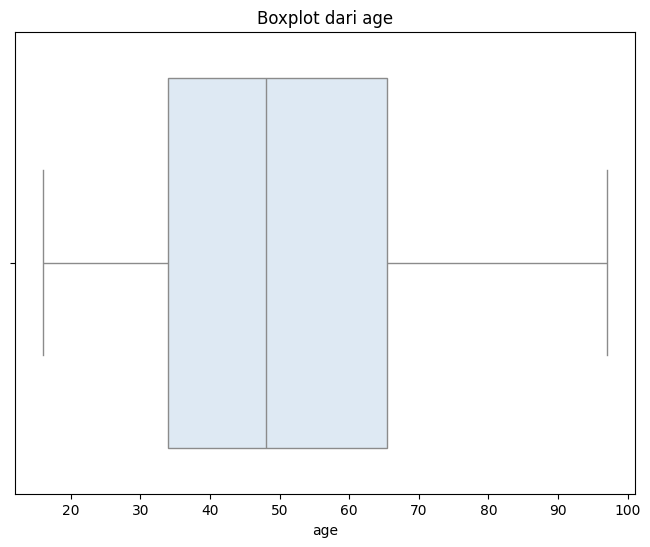

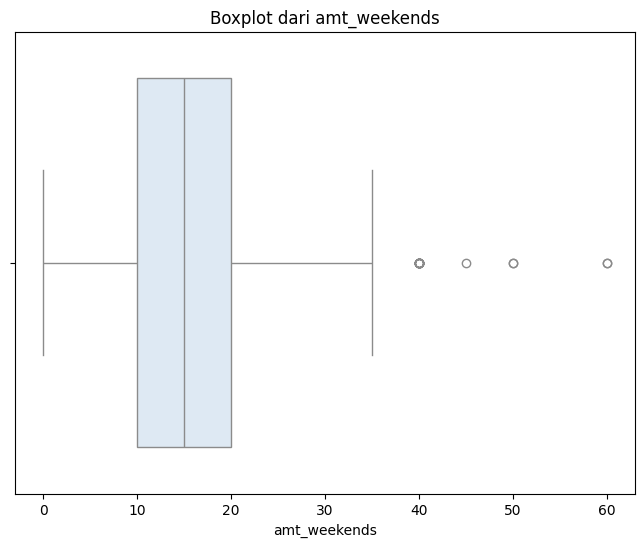

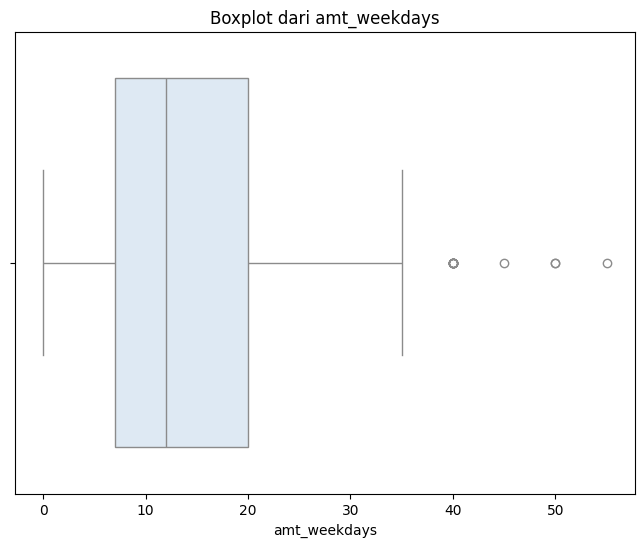

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64'])

# Mengatur gaya warna biru
sns.set_palette("Blues")

# Membuat boxplot untuk setiap fitur numerik
for kolom in kolom_numerik.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[kolom])
    plt.title(f'Boxplot dari {kolom}')
    plt.xlabel(kolom)
    plt.show()


Scatter Plot

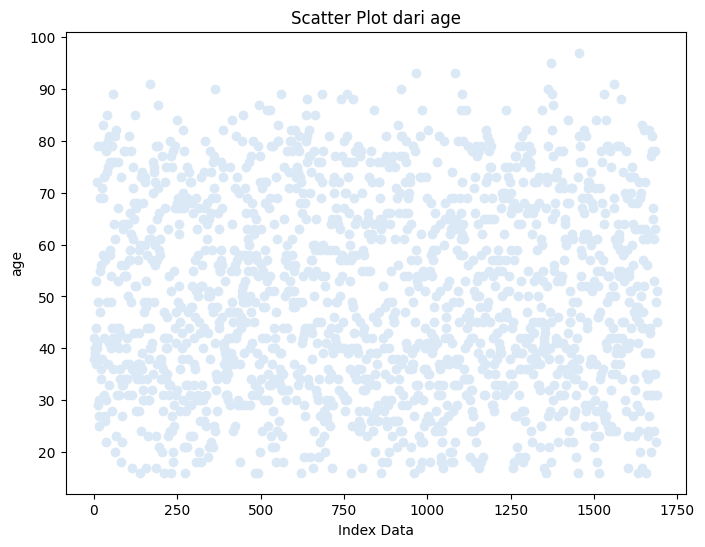

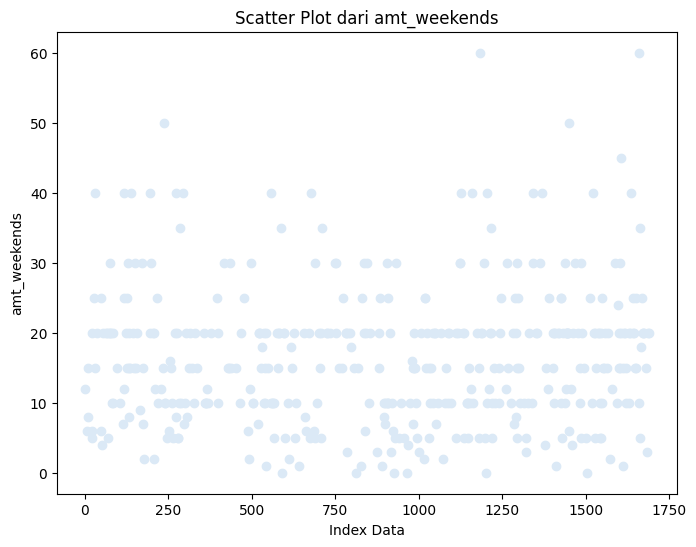

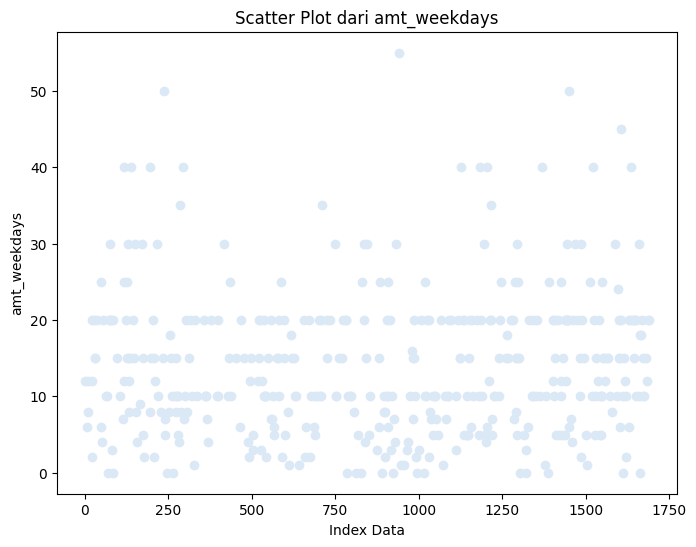

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Memilih kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64'])

# Membuat scatter plot untuk setiap fitur numerik
for kolom in kolom_numerik.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[kolom])
    plt.title(f'Scatter Plot dari {kolom}')
    plt.xlabel('Index Data')
    plt.ylabel(kolom)
    plt.show()


Heat Map

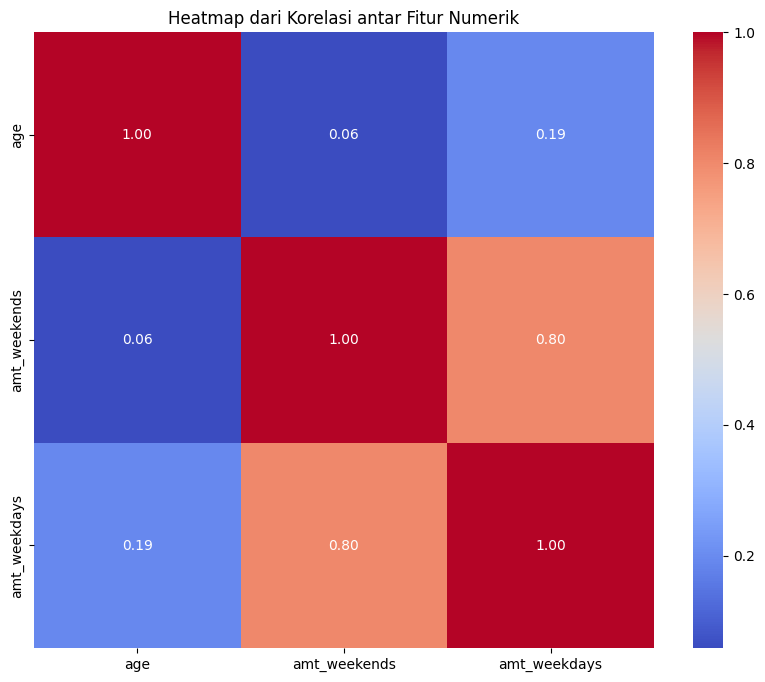

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64'])

# Menghitung korelasi antar kolom numerik
korelasi = kolom_numerik.corr()

# Membuat heat map
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap dari Korelasi antar Fitur Numerik')
plt.show()


Distributions

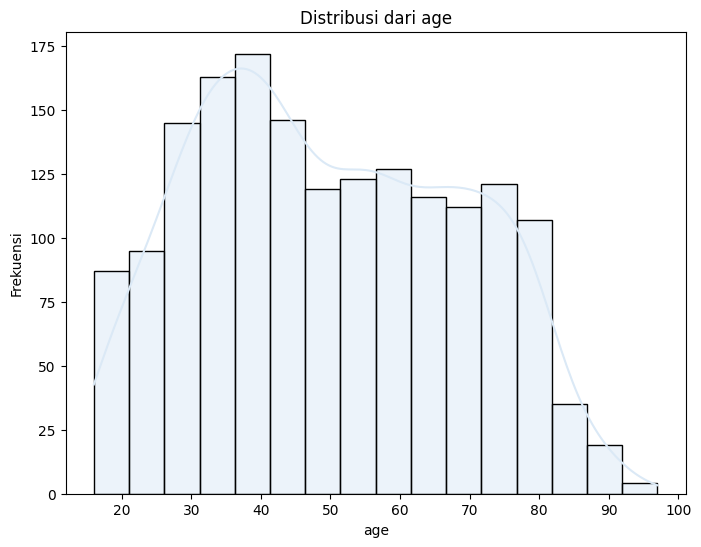

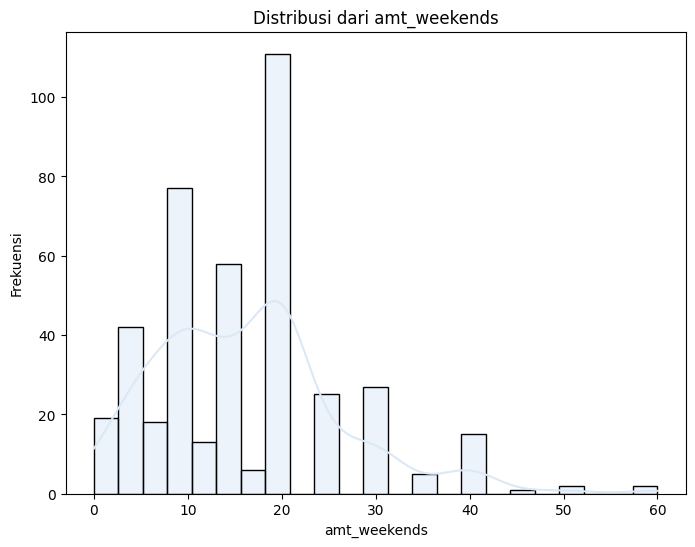

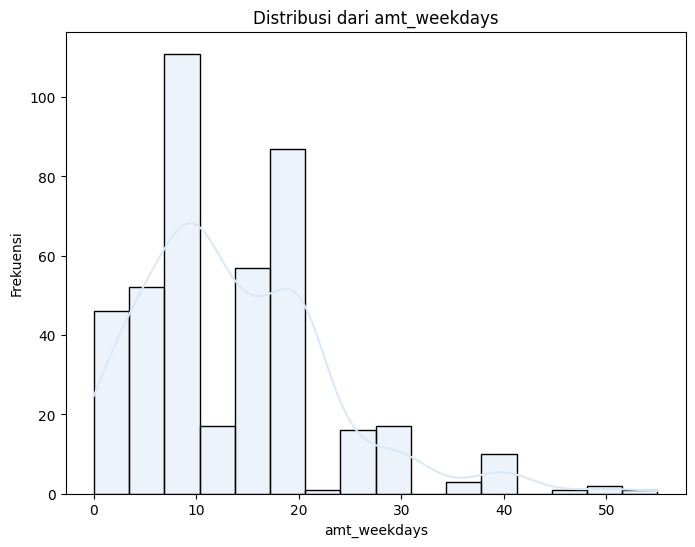

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64'])

# Membuat plot distribusi untuk setiap fitur numerik
for kolom in kolom_numerik.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[kolom], kde=True)
    plt.title(f'Distribusi dari {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frekuensi')
    plt.show()


Line Plot

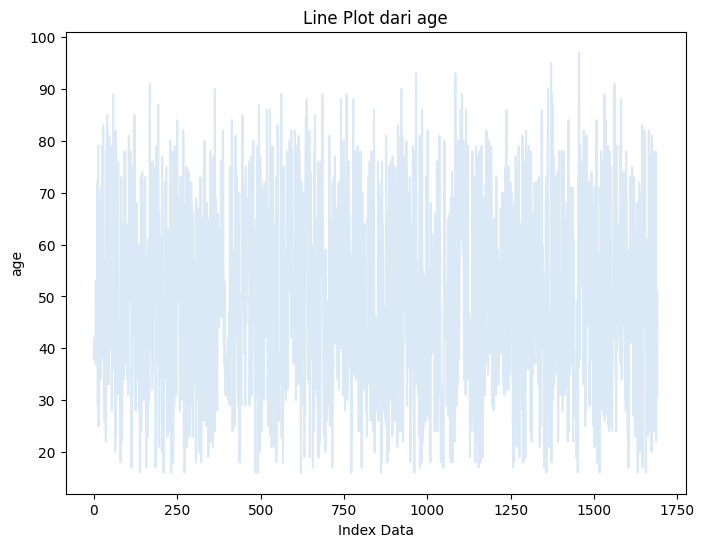

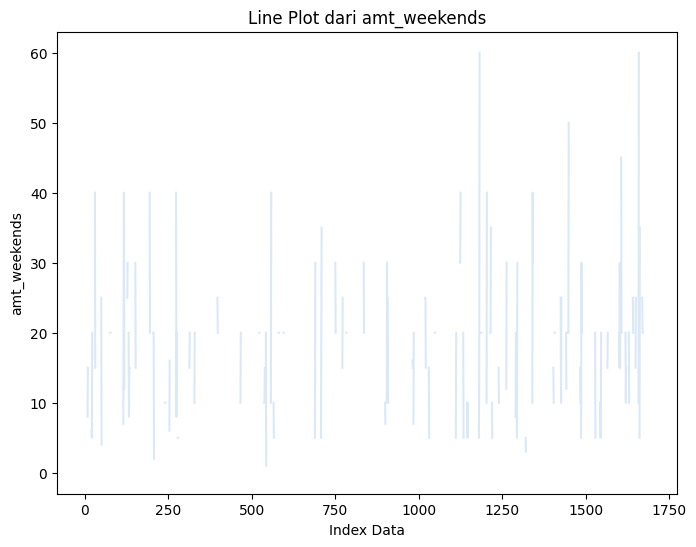

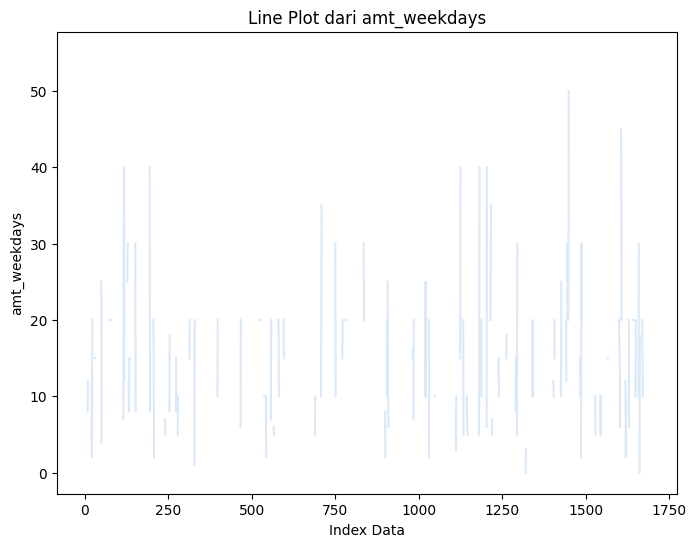

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Memilih kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64'])

# Membuat line plot untuk setiap fitur numerik
for kolom in kolom_numerik.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(df.index, df[kolom])
    plt.title(f'Line Plot dari {kolom}')
    plt.xlabel('Index Data')
    plt.ylabel(kolom)
    plt.show()


Violin Plot

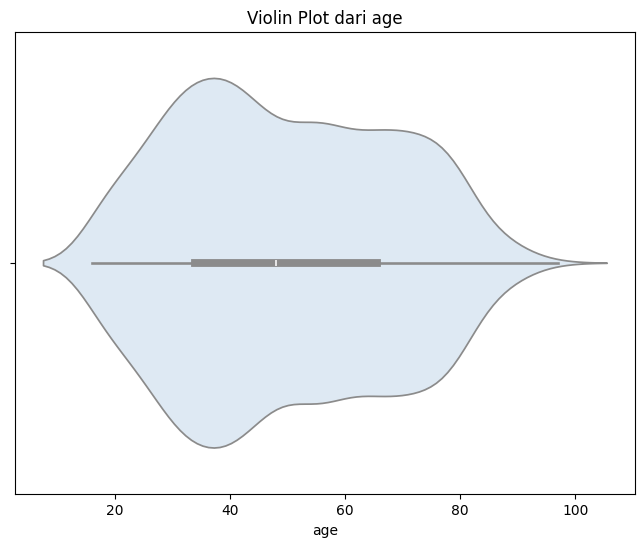

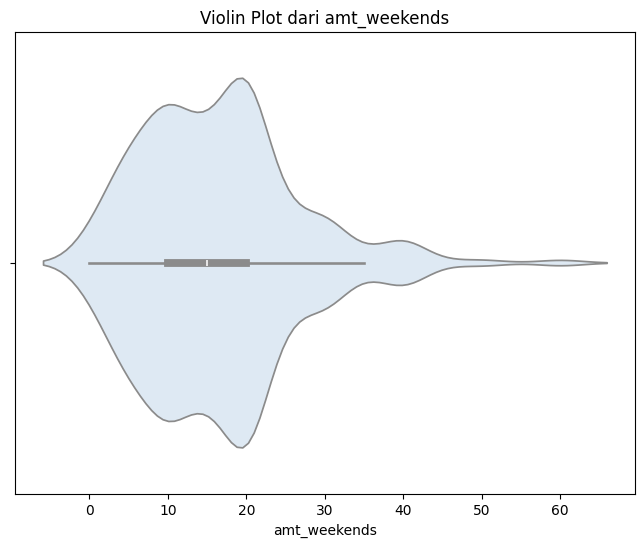

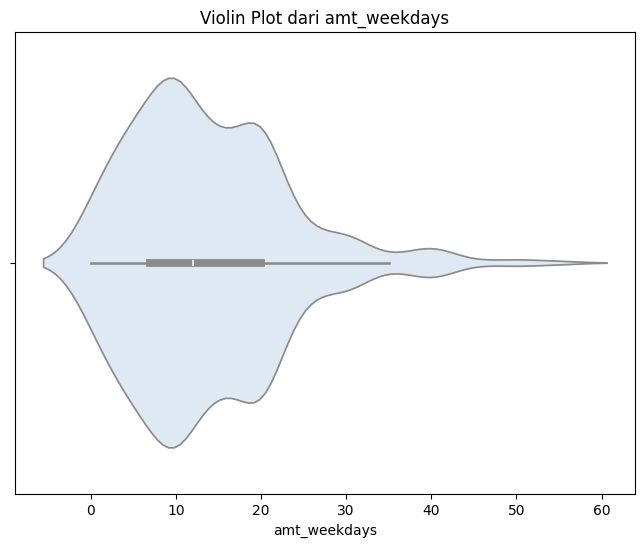

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64'])

# Mengatur gaya warna biru
sns.set_palette("Blues")

# Membuat violin plot untuk setiap fitur numerik
for kolom in kolom_numerik.columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[kolom])
    plt.title(f'Violin Plot dari {kolom}')
    plt.xlabel(kolom)
    plt.show()


Nomogram

In [16]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import patsy

# Memilih kolom numerik dan membersihkan data null
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).dropna()

# Menentukan variabel dependen dan independen
formula = "variabel_dependen ~ " + " + ".join(kolom_numerik.columns)
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

# Membuat model regresi linear
model = sm.OLS(y, X).fit()

# Membuat nomogram
def plot_nomogram(model, ax=None):
    if ax is None:
        ax = plt.gca()
    names = [name for name in model.params.index if 'Intercept' not in name]
    values = [model.params[name] for name in names]
    odds_ratios = np.exp(values)
    sort_idx = np.argsort(odds_ratios)
    names_sorted = [names[i] for i in sort_idx]
    odds_ratios_sorted = [odds_ratios[i] for i in sort_idx]
    ax.plot(odds_ratios_sorted, range(len(odds_ratios_sorted)), marker='o')
    ax.set_yticks(range(len(odds_ratios_sorted)))
    ax.set_yticklabels(names_sorted)
    ax.set_xlabel('Odds Ratio')
    ax.set_ylabel('Predictors')
    ax.set_title('Nomogram')
    ax.grid(True)

plt.figure(figsize=(8, 6))
plot_nomogram(model)
plt.show()


PatsyError: Error evaluating factor: NameError: name 'variabel_dependen' is not defined
    variabel_dependen ~ age + amt_weekends + amt_weekdays
    ^^^^^^^^^^^^^^^^^